# IMPORT LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split data to training & test 
from sklearn.model_selection import train_test_split

# standard datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# classifier algo
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

# clustering algo
from sklearn.cluster import KMeans

from sklearn import metrics


# HELPER FUNCTIONS

In [19]:
# Ref: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

def getPerfMeasures(y_true, y_pred):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average = None)
    recall = metrics.recall_score(y_true, y_pred, average = None)
    f1_score = metrics.f1_score(y_true, y_pred, average = None)
    # todo: add Mean Absolute Error, Mean Squared Error
    return accuracy, precision, recall, f1_score

def viewConfMatrixAndPerfMeasures(y_true, y_pred):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    
    # use heatmap to get result
    sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.tight_layout()
    
    # get performance measures
    accuracy, precision, recall, f1_score = getPerfMeasures(y_true, y_pred)
    print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", f1_score)
    print(conf_matrix)
#     print (f"{i:<9}{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")
    

# IMPORT DATA

In [20]:
#import dataset
data = pd.read_csv("../processed_data/spambase.csv")
data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
print(data.columns)
print(len(data.columns))
print(len(data))

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


# EDA

In [ ]:
grouped_data = data.groupby(data['class'])
print(grouped_data[data.columns[0]].describe(include='all'))

In [ ]:
data[data[data.columns[0]] == 0]

In [ ]:
print (f"{'col_idx':<9}{'columns':<30}{'0s':<10}{'other': <10}")
for i in range(len(data.columns)):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (f"{i:<9}{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")

In [ ]:
# TODO: plot for all columns
import math
columns = len(data.columns)
print(columns)
for i in range(math.ceil(columns/10)):
    
    fig, axes = plt.subplots(1, 11, figsize = (20, 5))
    for j in range(10):
        if i * 10 + j < columns:
            sns.boxplot(x='class', y = data.columns[i * 10 + j], data = data, orient = 'v', ax = axes[j], whis=10)
    plt.tight_layout()
    plt.cla()

In [ ]:
## TODO: more EDA

# Data Modelling
## Classification
- Using Decision Tree, KNN, Naive Bayes & SVM

In [52]:
#Splitting dataset for classification

#creating test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'],test_size=0.25, random_state=0)
# print(len(x_train))
print("Test Data: ", len(x_test))
#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)

print("Train Data: ", len(x_train))
print("Validating Data: ", len(x_val))
# print(x_train)

Test Data:  1151
Train Data:  2587
Validating Data:  863
      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
3978            0.00               0.00           0.00           0.0   
3882            0.00               0.00           0.00           0.0   
1508            0.00               0.74           0.00           0.0   
1208            0.47               0.31           0.47           0.0   
369             0.00               0.00           1.34           0.0   
...              ...                ...            ...           ...   
657             0.00               0.66           0.66           0.0   
4522            0.00               0.00           0.00           0.0   
2235            0.00               0.00           0.00           0.0   
2086            0.00               0.00           0.00           0.0   
2206            0.00               0.00           1.29           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
3

In [102]:
#standardizing datasets for classification
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))
x_val_scaled = pd.DataFrame(scaler.transform(x_val))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

### Classification: Decision Tree

In [7]:
# train with Decision Tree
decisionTreeClf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decisionTreeClf.fit(x_train_scaled,y_train)

# estimate the skill of model -> lest try with validation dataset
y_val_pred = decisionTreeClf.predict(x_val_scaled)

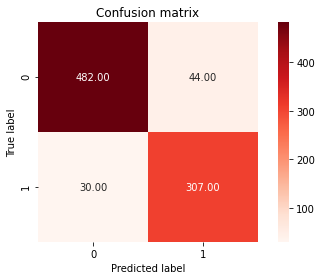

In [8]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [ ]:
# TODO: How to get best attributes?

### Classification: K Nearest Neighbors

In [ ]:
# train with KNN
# Using K = 3
knnClf = KNeighborsClassifier(n_neighbors = 3, weights='distance')  
knnClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = knnClf.predict(x_val_scaled)

In [ ]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [ ]:
# Finding the best K value
max_acc = 0
optimal_k = 1
print (f"{'K value':<10}{'Acurracy':<20}{'Precision':<20}{'Recall': <20}{'F1 Score': <20}")
for k in range(1, 20):
    knnClf = KNeighborsClassifier(n_neighbors = k, weights='distance')  
    knnClf.fit(x_train_scaled,y_train)
    y_val_pred = knnClf.predict(x_val_scaled)
    
    accuracy, precision, recall, f1_score = getPerfMeasures(y_val, y_val_pred)
    
    # decide optimal K based on optimal accuracy (is this right?)
    if max_acc < accuracy:
        max_acc = accuracy
        optimal_k = k
    print (f"{k:<10}{accuracy:<20}{precision[0]:<20}{recall[0]: <20}{f1_score[0]: <20}")
print()
print (f"{'Optimal k: ':<15}{optimal_k:<20}")
print (f"{'Accuracy ':<15}{max_acc:<20}")

In [ ]:
# Use optimal k for validate dataset
knnClf = KNeighborsClassifier(n_neighbors = optimal_k, weights='distance')  
knnClf.fit(x_train_scaled,y_train)
y_val_pred = knnClf.predict(x_val_scaled)

viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

### Classification: Naive Bayes

#### Gaussian Naive Bayes

In [111]:
# train with Gaussian Naive Bayes
nbClf = GaussianNB()  
nbClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

Accuracy =  0.8111239860950173 
Precision = [0.96183206 0.68510638] 
Recall =  [0.71863118 0.95548961] 
F1 Score =  [0.8226333  0.79801735]
[[378 148]
 [ 15 322]]


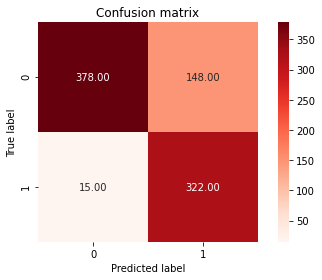

In [112]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Multinomial Naive Bayes

In [117]:
# train with Multinomial Naive Bayes
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled1 = pd.DataFrame(scaler.transform(x_train))
x_val_scaled1 = pd.DataFrame(scaler.transform(x_val))
nbClf = MultinomialNB()  
nbClf.fit(x_train_scaled1,y_train)
print(x_train_scaled1)
# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled1)

            0         1         2    3      4         5         6         7   \
0     0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2     0.000000  0.051821  0.000000  0.0  0.000  0.253401  0.101788  0.000000   
3     0.103524  0.021709  0.127027  0.0  0.005  0.025510  0.006878  0.020702   
4     0.000000  0.000000  0.362162  0.0  0.067  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...    ...       ...       ...       ...   
2582  0.000000  0.046218  0.178378  0.0  0.133  0.056122  0.045392  0.000000   
2583  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2584  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2585  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2586  0.000000  0.000000  0.348649  0.0  0.000  0.000000  0.000000  0.000000   

            8         9   ...     47   

Accuracy =  0.895712630359212 
Precision = [0.87586207 0.93639576] 
Recall =  [0.96577947 0.78635015] 
F1 Score =  [0.91862568 0.85483871]
[[508  18]
 [ 72 265]]


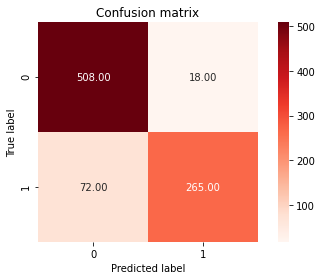

In [114]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Bernoulli Naive Bayes

In [118]:
# train with Bernoulli Naive Bayes
nbClf = BernoulliNB()
x_train_scaled2 = x_train.apply(lambda x: [0 if z <= 0 else 1 for z in x])
x_val_scaled2 = x_val.apply(lambda x: [0 if z <= 0 else 1 for z in x])

print(x_train_scaled2)
nbClf.fit(x_train_scaled2,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
3978               0                  0              0             0   
3882               0                  0              0             0   
1508               0                  1              0             0   
1208               1                  1              1             0   
369                0                  0              1             0   
...              ...                ...            ...           ...   
657                0                  1              1             0   
4522               0                  0              0             0   
2235               0                  0              0             0   
2086               0                  0              0             0   
2206               0                  0              1             0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
3978              0               0                 0     

Accuracy =  0.8910776361529548 
Precision = [0.86860068 0.93862816] 
Recall =  [0.96768061 0.77151335] 
F1 Score =  [0.91546763 0.84690554]
[[509  17]
 [ 77 260]]


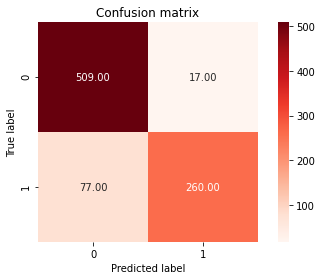

In [116]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Assessment of Naive Bayes Classification
- Gaussian: Accuracy ~ 81.1%
    - is suitable for data with standard (Gaussian) distribution. If original data is not Gaussian, it must be tranformed to Gaussain. Therefore, the ratio of value, more or less, will be changed and caused difference with the original data. Also, Gaussian is more suitable for continuous variable (which is not the case of the problem since frequency is countable) 
- Multinomial: Accuracy ~ 89.6%
    - Using scale min max to transform so the ratio is preserved (just shrink to range 0-1). Hence, data property is still unchanged
- Bernoulli: Accuracy ~ 89.1%
    - Consider only if the word is present or not without its frequency so data remained unchanged and so does its property

- Overall
    + Naive Bayes classification is a simple probability algorithm based on the fact, that all features of the model are independent. In the context of the spam filter, we suppose, that every word in the message is independent of all other words and we count them with the ignorance of the context. The probability of a word to belong to the spam message is a frequency of this word in the “spam part” of our dataset. Our dataset of spam from spambase consists of independent words considered to be spam regardless of context they appeared together
    + => Using Naïve Bayes Classification is appropriate


### Classification: SVM

In [ ]:
# train with SVM
svmClf = SVC(kernel = 'rbf', gamma = 'auto')  
svmClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = svmClf.predict(x_val_scaled)

In [ ]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

## Performance Test
### Use SVM for test dataset

In [ ]:
y_test_pred = svmClf.predict(x_test_scaled)

In [ ]:
viewConfMatrixAndPerfMeasures(y_test,y_test_pred)